Matplotlib is building the font cache; this may take a moment.


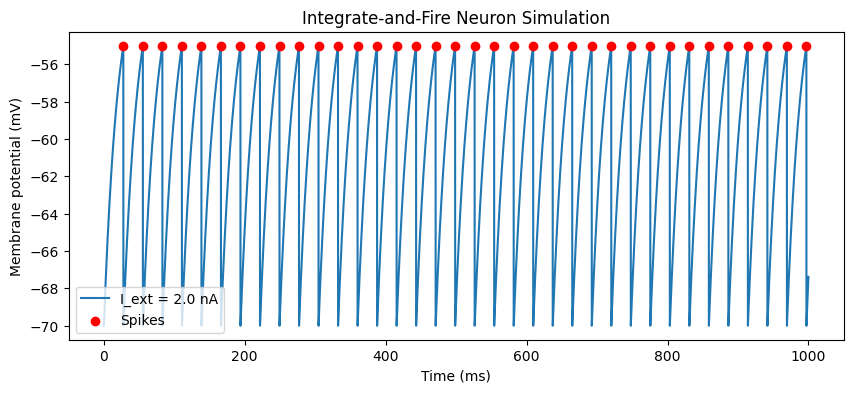

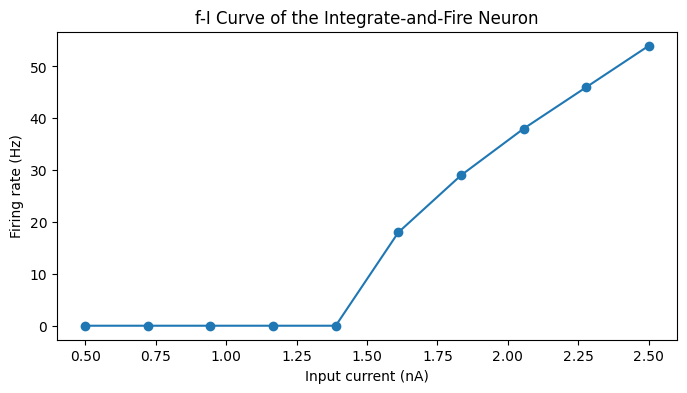

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# -------------------------------
# Simulation parameters
# -------------------------------
T = 1000.0       # Total simulation time in ms
dt = 0.1         # Time step in ms
time = np.arange(0, T + dt, dt)
num_steps = len(time)

# -------------------------------
# Neuron parameters (biologically plausible)
# -------------------------------
V_rest = -70.0       # Resting membrane potential (mV)
V_reset = -70.0      # Reset potential after a spike (mV)
V_threshold = -55.0  # Spike threshold (mV)
tau_m = 20.0         # Membrane time constant (ms)
R = 10.0             # Membrane resistance (MΩ)
# (Note: 1 nA * 10 MΩ = 10 mV depolarization)

def simulate_IF_neuron(I_ext):
    """
    Simulate a simple integrate-and-fire neuron with a constant input current I_ext (in nA).

    Parameters:
        I_ext (float): External input current in nA.
    
    Returns:
        V (ndarray): Membrane potential trace over time.
        spike_times (list): Times (in ms) when spikes occurred.
    """
    V = np.zeros(num_steps)
    V[0] = V_rest
    spike_times = []

    for i in range(1, num_steps):
        # Euler method to update the membrane potential
        dV = dt / tau_m * (-(V[i-1] - V_rest) + R * I_ext)
        V[i] = V[i-1] + dV

        # Check if the threshold is crossed
        if V[i] >= V_threshold:
            spike_times.append(time[i])
            V[i] = V_reset  # Reset the potential after a spike

    return V, spike_times

# -------------------------------
# Part 1: Visualize a single simulation
# -------------------------------
I_example = 2.0  # Input current in nA (choose a value above threshold)
V_example, spikes_example = simulate_IF_neuron(I_example)

plt.figure(figsize=(10, 4))
plt.plot(time, V_example, label=f'I_ext = {I_example} nA')
# Mark spike times on the trace
plt.scatter(spikes_example, [V_threshold]*len(spikes_example), color='red', zorder=5, label='Spikes')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane potential (mV)')
plt.title('Integrate-and-Fire Neuron Simulation')
plt.legend()
plt.show()

# -------------------------------
# Part 2: Analyze firing rate vs. input current (f-I curve)
# -------------------------------
I_values = np.linspace(0.5, 2.5, 10)  # Define input currents from 0.5 nA to 2.5 nA
firing_rates = []

for I_ext in I_values:
    V, spike_times = simulate_IF_neuron(I_ext)
    num_spikes = len(spike_times)
    # Firing rate in Hz: spikes per second (T is in ms)
    firing_rate = num_spikes / (T / 1000.0)
    firing_rates.append(firing_rate)

plt.figure(figsize=(8, 4))
plt.plot(I_values, firing_rates, marker='o')
plt.xlabel('Input current (nA)')
plt.ylabel('Firing rate (Hz)')
plt.title('f-I Curve of the Integrate-and-Fire Neuron')
plt.show()
